In [1]:

def is_safe(board, row, col):
	for i in range(col):
		if board[row][i] == 1:
			return False
	for i, j in zip(range(row,-1,-1), range(col,-1,-1)):
		if board[i][j] == 1:
			return False
	for i, j in zip(range(row, len(board), 1), range(col,-1,-1)):
		if board[i][j] == 1:
			return False
	return True

def solve_n_queens(board, col):
	if col >= len(board):
		return True
	for i in range(len(board)):
		if is_safe(board, i, col):
			board[i][col] = 1
			if solve_n_queens(board, col + 1):
				return True
			board[i][col] = 0
	return False

def print_board(board):
	for row in board:
		print(" ".join("Q" if col else "." for col in row))

def solve_8_queens():
	n = 8
	board = [[0] * n for _ in range(n)]
	if solve_n_queens(board, 0):
		print_board(board)
	else:
		print("Solution does not exist")

solve_8_queens()




Q . . . . . . .
. . . . . . Q .
. . . . Q . . .
. . . . . . . Q
. Q . . . . . .
. . . Q . . . .
. . . . . Q . .
. . Q . . . . .


DFS Traversal Order: ['A', 'B', 'D', 'E', 'F']
Path exists between A and F: True


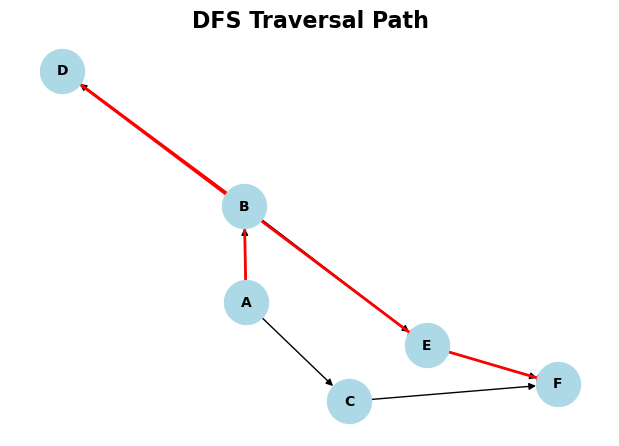

In [2]:
# Install required libraries (run only once in Jupyter)
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Define the graph as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Create a directed graph with networkx
G = nx.DiGraph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# DFS with visualization (records the traversal order)
def dfs_visual(graph, start, goal, visited=None, order=None):
    if visited is None:
        visited = set()
    if order is None:
        order = []

    visited.add(start)
    order.append(start)

    if start == goal:
        return True, order
    
    for neighbor in graph[start]:
        if neighbor not in visited:
            found, result_order = dfs_visual(graph, neighbor, goal, visited, order)
            if found:
                return True, result_order
    
    return False, order

# Run DFS
start_node = 'A'
goal_node = 'F'
found, traversal_order = dfs_visual(graph, start_node, goal_node)

print(f"DFS Traversal Order: {traversal_order}")
print(f"Path exists between {start_node} and {goal_node}: {found}")

# --- Visualization ---
pos = nx.spring_layout(G)  # layout for positioning nodes

plt.figure(figsize=(6,4))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000, font_size=10, font_weight="bold", arrows=True)

# Highlight traversal path
path_edges = list(zip(traversal_order, traversal_order[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)

plt.title("DFS Traversal Path", fontsize=16, fontweight="bold")
plt.show()


In [1]:
import heapq

def best_first_search(graph, start, goal, h):
    pq = []
    heapq.heappush(pq, (h[start], start))
    visited = set()

    while pq:
        cost, node = heapq.heappop(pq)

        if node == goal:
            print(f"Goal {goal} found!")
            return

        if node not in visited:
            visited.add(node)
            print(f"Visiting node {node}")

            for neighbor, weight in graph[node]:
                if neighbor not in visited:
                    heapq.heappush(pq, (h[neighbor], neighbor))


# Graph definition
graph = {
    'A': [('B', 1), ('C', 3)],
    'B': [('D', 5), ('E', 6)],
    'C': [('F', 7)],
    'D': [],
    'E': [('F', 4)],
    'F': []
}

# Heuristic values
heuristic = {
    'A': 10,
    'B': 8,
    'C': 5,
    'D': 7,
    'E': 3,
    'F': 0
}

# Run the search
best_first_search(graph, 'A', 'F', heuristic)


Visiting node A
Visiting node C
Goal F found!


In [2]:
from collections import deque

def is_solvable(state):
    inversions = 0
    flat_state = [num for row in state for num in row if num != 0]
    for i in range(len(flat_state)):
        for j in range(i + 1, len(flat_state)):
            if flat_state[i] > flat_state[j]:
                inversions += 1
    return inversions % 2 == 0


def bfs(start, goal):
    queue = deque([start])
    visited = set()
    visited.add(tuple(map(tuple, start)))

    while queue:
        current = queue.popleft()

        if current == goal:
            print("Solution found!")
            return

        # TODO: Implement movement logic here (left, right, up, down)
        # Expand the state and add new states to the queue
        # Check if the state is already visited

    print("No solution exists.")


# Initial and goal states
initial_state = [[1, 2, 3],
                 [4, 0, 5],
                 [6, 7, 8]]

goal_state = [[1, 2, 3],
              [4, 5, 6],
              [7, 8, 0]]

# Run
if is_solvable(initial_state):
    bfs(initial_state, goal_state)
else:
    print("This puzzle is not solvable.")


No solution exists.


In [4]:
# Example of robot navigation
def robot_navigation(start, goal):
    print(f"Robot starts at {start}")
    
    while start != goal:
        if start[0] < goal[0]:
            start = (start[0] + 1, start[1])
        elif start[0] > goal[0]:
            start = (start[0] - 1, start[1])

        if start[1] < goal[1]:
            start = (start[0], start[1] + 1)
        elif start[1] > goal[1]:
            start = (start[0], start[1] - 1)

        print(f"Robot moves to {start}")

    print("Robot reached the goal.")


# Run example
robot_navigation((0, 0), (3, 3))

Robot starts at (0, 0)
Robot moves to (1, 1)
Robot moves to (2, 2)
Robot moves to (3, 3)
Robot reached the goal.


In [5]:
from itertools import permutations

def tsp_bruteforce(graph, start):
    vertices = list(graph.keys())
    vertices.remove(start)
    min_path = float('inf')

    for perm in permutations(vertices):
        current_cost = 0
        k = start

        for j in perm:
            current_cost += graph[k][j]
            k = j

        current_cost += graph[k][start]  # return to start
        min_path = min(min_path, current_cost)

    return min_path


# Graph definition
graph = {
    'A': {'B': 10, 'C': 15, 'D': 20},
    'B': {'A': 10, 'C': 35, 'D': 25},
    'C': {'A': 15, 'B': 35, 'D': 30},
    'D': {'A': 20, 'B': 25, 'C': 30}
}

# Run TSP
print("Minimum TSP cost:", tsp_bruteforce(graph, 'A'))


Minimum TSP cost: 80


In [6]:
class KnowledgeBase:
    def __init__(self):
        # Initialize an empty set for facts and an empty list for rules
        self.facts = set()
        self.rules = []

    def add_fact(self, fact):
        """
        Adds a fact to the knowledge base.
        :param fact: String representing the fact
        """
        self.facts.add(fact)
        print(f"Added fact: {fact}")

    def add_rule(self, rule):
        """
        Adds a rule to the knowledge base.
        :param rule: String representing the rule
        """
        self.rules.append(rule)
        print(f"Added rule: {rule}")

    def check_fact(self, fact):
        """
        Checks if a fact is in the knowledge base.
        :param fact: String representing the fact
        :return: Boolean (True if fact is in the knowledge base, False otherwise)
        """
        return fact in self.facts

    def print_facts(self):
        """
        Prints all the facts currently in the knowledge base.
        """
        print("\nCurrent Facts in Knowledge Base:")
        for fact in self.facts:
            print(fact)

    def print_rules(self):
        """
        Prints all the rules currently in the knowledge base.
        """
        print("\nCurrent Rules in Knowledge Base:")
        for rule in self.rules:
            print(rule)


# Example usage
if __name__ == "__main__":
    # Create an instance of the KnowledgeBase
    kb = KnowledgeBase()

    # Add some facts to the knowledge base
    kb.add_fact("Cats are mammals")
    kb.add_fact("Birds can fly")
    kb.add_fact("Fish live in water")

    # Add some rules to the knowledge base
    kb.add_rule("If it has feathers, it is a bird")
    kb.add_rule("If it has scales, it is a fish")

    # Check if a fact exists in the knowledge base
    print("\nChecking if the fact 'Fish live in water' exists:")
    print(kb.check_fact("Fish live in water"))

    # Print all facts in the knowledge base
    kb.print_facts()

    # Print all rules in the knowledge base
    kb.print_rules()


Added fact: Cats are mammals
Added fact: Birds can fly
Added fact: Fish live in water
Added rule: If it has feathers, it is a bird
Added rule: If it has scales, it is a fish

Checking if the fact 'Fish live in water' exists:
True

Current Facts in Knowledge Base:
Birds can fly
Fish live in water
Cats are mammals

Current Rules in Knowledge Base:
If it has feathers, it is a bird
If it has scales, it is a fish


In [ ]:
class KnowledgeBase:
    def __init__(self):
        self.facts = set()   # A set to store known facts
        self.rules = []      # A list to store inference rules

    def add_fact(self, fact):
        self.facts.add(fact)
        print(f"Added fact: {fact}")

    def add_rule(self, rule):
        self.rules.append(rule)
        print(f"Added rule: {rule.__name__}")

    def infer(self):
        inferred = True
        while inferred:
            inferred = False
            for rule in self.rules:
                if rule():
                    inferred = True

    def check_fact(self, fact):
        return fact in self.facts


# Create an instance of the knowledge base
kb = KnowledgeBase()


# Define rules
def rule_animal_is_mammal():
    if "has_hair" in kb.facts and "gives_birth" in kb.facts:
        if "is_mammal" not in kb.facts:
            kb.add_fact("is_mammal")
            return True
    return False


def rule_animal_is_bird():
    if "has_feathers" in kb.facts and "lays_eggs" in kb.facts:
        if "is_bird" not in kb.facts:
            kb.add_fact("is_bird")
            return True
    return False


def rule_is_warm_blooded():
    if "is_mammal" in kb.facts or "is_bird" in kb.facts:
        if "is_warm_blooded" not in kb.facts:
            kb.add_fact("is_warm_blooded")
            return True
    return False


# Add rules to the knowledge base
kb.add_rule(rule_animal_is_mammal)
kb.add_rule(rule_animal_is_bird)
kb.add_rule(rule_is_warm_blooded)

# Add initial facts to the knowledge base
kb.add_fact("has_hair")
kb.add_fact("gives_birth")

# Perform reasoning (inference)
print("\nStarting inference process:")
kb.infer()

# Check and print the final facts
print("\nFinal Facts in the Knowledge Base:")
for fact in kb.facts:
    print(fact)


Added rule: rule_animal_is_mammal
Added rule: rule_animal_is_bird
Added rule: rule_is_warm_blooded
Added fact: has_hair
Added fact: gives_birth

Starting inference process:
Added fact: is_mammal
Added fact: is_warm_blooded

Final Facts in the Knowledge Base:
is_mammal
has_hair
is_warm_blooded
gives_birth
